In [1]:
# Import the required modules and functions 
%run 'general_functions.ipynb'

Using license file /home/users/hherrmann/gurobi.lic
Academic license - for non-commercial use only


In [ ]:
# Functions for plotting 
def exponential(x, k):
    # A0 is the same for all cells 
    # as determined experimentally 
    return 25*np.exp(x*k)

def set_growth(r):
    # Unit conversion 
    growth_rate = r*2.5e6/24/10000
    return growth_rate 

def plot_fit(dat,col,lab,m="mean"):
    # Plot the mean fit 
    if m == "mean":
        plot_dat = dat.mean(axis=1)
        line_style = "-"
        lab = lab
    # Plot the lower limit 
    elif m == "min":
        plot_dat = dat.min(axis=1)
        line_style = "--"
        lab = None
    # Plot the upper limit 
    elif m == "max":
        plot_dat = dat.max(axis=1)
        line_style = "--"
        lab = None
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, range(4), plot_dat, p0=[0.1])
    y_fitted = exponential(x,popt_exponential[0])
    growth = set_growth(popt_exponential[0])
    plt.plot(x, (y_fitted),line_style,label=lab,color=col,alpha=0.5)
    return(growth)

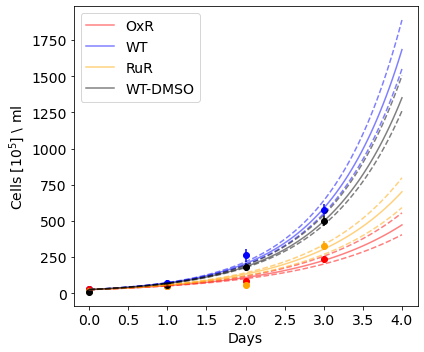

In [2]:
# Import the raw data
growth_data = pd.read_csv('../Data/growthCurves.csv')

# Get raw data for each condition 
wt = growth_data[['WT1',"WT2","WT3"]]
oxr = growth_data[['OxR1',"OxR2","OxR3"]]
rur_dmso = growth_data[['RuR_DMSO_1',"RuR_DMSO_2","RuR_DMSO_3"]]
wt_dmso = growth_data[['WT_DMSO_1',"WT_DMSO_2","WT_DMSO_3"]]

# Set up the figure 
plt.figure(figsize=(6,5))
fsize = 14
scaling = 10000

# Plot the averages and standard errors 
err_wt = [i/np.sqrt(1) for i in wt.std(axis=1)]
plt.errorbar(range(4),list(wt.mean(axis=1)),err_wt,color='b',fmt=" ")
plt.plot(range(4),(wt.mean(axis=1)),'bo')
plt.errorbar(range(4),list(oxr.mean(axis=1)),[i/np.sqrt(1) for i in oxr.std(axis=1)],
             color='r',fmt=" ")
plt.plot(range(4),(oxr.mean(axis=1)),'ro')
plt.errorbar(range(4),list(rur_dmso.mean(axis=1)),[i/np.sqrt(1) for i in rur_dmso.std(axis=1)],
             color='orange',fmt=" ")
plt.plot(range(4),(rur_dmso.mean(axis=1)),'o',color="orange")
plt.errorbar(range(4),list(wt_dmso.mean(axis=1)),[i/np.sqrt(1) for i in wt_dmso.std(axis=1)],
             color='k',fmt=" ")
plt.plot(range(4),(wt_dmso.mean(axis=1)),'ko')

x = np.linspace(0,4,100)

# Plot the mean fit and the lower and upper limit for each condition 

oxr_gr_mean = plot_fit(oxr,'r','OxR')
oxr_gr_min = plot_fit(oxr,'r','OxR',"min")
oxr_gr_max = plot_fit(oxr,'r','OxR',"max")

wt_gr_mean = plot_fit(wt,'b','WT')
wt_gr_min = plot_fit(wt,'b','WT',"min")
wt_gr_max = plot_fit(wt,'b','WT',"max")

rur_dmso_gr_mean = plot_fit(rur_dmso,'orange','RuR')
rur_dmso_gr_min = plot_fit(rur_dmso,'orange','RuR',"min")
rur_dmso_gr_max = plot_fit(rur_dmso,'orange','RuR',"max")

wt_dmso_gr_mean = plot_fit(wt_dmso,'k','WT-DMSO')
wt_dmso_gr_min = plot_fit(wt_dmso,'k','WT-DMSO',"min")
wt_dmso_gr_max = plot_fit(wt_dmso,'k','WT-DMSO',"max")

# Make figure pretty and save to file
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xlabel("Days",fontsize=fsize)
plt.ylabel("Cells [$10^5$] \ ml",fontsize=fsize)
plt.legend(fontsize=fsize)
plt.tight_layout()
plt.savefig("../Figures/GrowthRate.svg")
plt.show()

In [3]:
# Gather the calculated growth rates  
growth_rates_min = [wt_gr_min,oxr_gr_min,wt_dmso_gr_min,rur_dmso_gr_min]
growth_rates_max = [wt_gr_max,oxr_gr_max,wt_dmso_gr_max,rur_dmso_gr_max]
growth_rates_mean = [wt_gr_mean,oxr_gr_mean,wt_dmso_gr_mean,rur_dmso_gr_mean]